<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/kmeans/02_selection_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# **Generador Data**
---

In [ ]:
X, y = make_blobs(
    n_samples     = 300,
    n_features    = 2,
    centers       = 4,
    cluster_std   = 0.60, 
    shuffle       = True,
    random_state  = 0
)

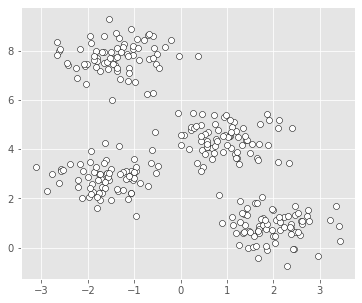

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)

In [ ]:
X_scale = scale(X)

model_kmeans = KMeans(n_clusters=4, n_init=25, random_state=147)
model_kmeans.fit(X=X_scale)

KMeans(n_clusters=4, n_init=25, random_state=147)

In [ ]:
# Número de centroides
model_kmeans.cluster_centers_

array([[-0.83691948,  1.46193015],
       [ 1.21774671, -1.19712077],
       [-0.96619422, -0.43906093],
       [ 0.58536699,  0.17425154]])

In [ ]:
model_kmeans.labels_

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

In [ ]:
model_kmeans.inertia_

56.0247705750995

In [ ]:
y_predict = model_kmeans.predict(X=X_scale)

In [ ]:
y_predict = model_kmeans.predict(X=X_scale)
y_predict

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

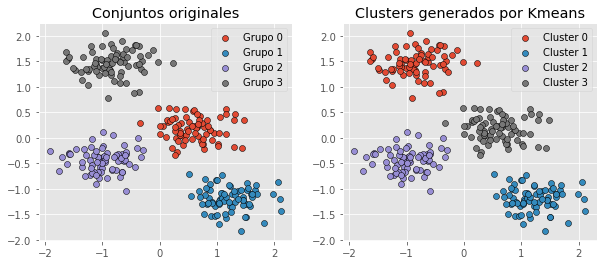

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for i in np.unique(y):
  ax[0].scatter(
      x = X_scale[y==i, 0],
      y = X_scale[y==i, 1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label= f"Grupo {i}"
  )

ax[0].set_title('Conjuntos originales')
ax[0].legend();

for i in np.unique(y_predict):
  ax[1].scatter(
      x = X_scale[y_predict == i, 0],
      y = X_scale[y_predict == i, 1], 
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker    = 'o',
      edgecolor = 'black', 
      label= f"Cluster {i}"
  )
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

El número de aciertos y errores puede representarse en modo de matriz de confusión. A la hora de interpretar estas matrices, es importante recordar que el clustering asigna las observaciones a clusters cuyo identificador no tiene porqué coincidir con la nomenclatura empleada para los grupos reales. 

El grupo 1 se ha asignado al cluster 3. Así pues, por cada fila de la matriz cabe esperar un valor alto (coincidencias) para una de las posiciones y valores bajos en las otras (errores de clasificación), pero no tienen por qué coincidir los nombres (diagonal).

In [ ]:
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])


cluster,0,1,2,3
grupo_real,,,,
0,0,0,0,75
1,0,75,0,0
2,0,0,75,0
3,75,0,0,0


En este análisis, todas las observaciones se han clasificado correctamente. De nuevo repetir que, en la realidad, no se suelen conocer los verdaderos grupos en los que se dividen las observaciones, de lo contrario no se necesitaría aplicar clustering.

Suponga K=6 y K=6

In [ ]:
y_predict = KMeans(n_clusters=2, n_init = 25, random_state=123).fit_predict(X=X_scale)
ax[0].scatter(
    x = X_scale[:, 0],
    y = X_scale[:, 1], 
    c = y_predict,
    #cmap='viridis',
    marker    = 'o',
    edgecolor = 'black'
)
ax[0].set_title('KMeans K=2');

y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scale)
ax[1].scatter(
        x = X_scale[:, 0],
        y = X_scale[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

# **Metodo Elbow**
---

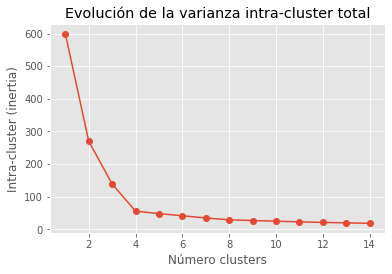

In [ ]:
def elbow(data):
  range_n_clusters = range(1, 15)
  inertia = []
  for n_cluster in range_n_clusters:
    model_kmeans = KMeans(
        n_clusters   = n_cluster,
        n_init       = 20,
        random_state = 1234
    )
    model_kmeans.fit(data)
    inertia.append(model_kmeans.inertia_)
  fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
  ax.plot(range_n_clusters, inertia, marker='o')
  ax.set_title("Evolución de la varianza intra-cluster total")
  ax.set_xlabel('Número clusters')
  ax.set_ylabel('Intra-cluster (inertia)');
  
elbow(X_scale)

A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción.

# **Método silhouette para identificar el número óptimo de clusters**
---


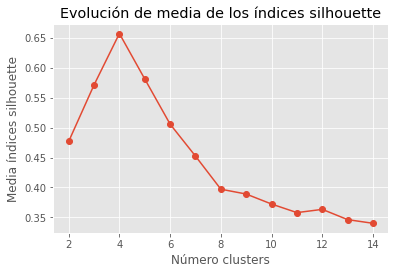

In [ ]:
range_n_cluster = range(2, 15)
valores_medios_silhouette = []

for n_cluster in range_n_cluster:
  model_kmeans = KMeans(
      n_clusters     = n_cluster,
      n_init = 20,
      random_state = 1234
  )
  cluster_labels = model_kmeans.fit_predict(X_scale)
  silhouette_avg = silhouette_score(X_scale, cluster_labels)
  valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_cluster, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

El valor medio de los índices silhouette se maximiza con 4 clusters. Acorde a este criterio, K = 4 es la mejor opción.